Another method of seeking to improve on the single decision tree is known as boosting. (The other being random forest).

Section Overview:

- Boosting and meta learning
- AdaBoost (Adaptive Boosting) theory
- Example of AdaBoost
- Gradient boosting method
- Example of gradient boosting

# Motivation and History

It is a methodology applied to an already existing ML algorithm to try to yield better results (most commonly on decision trees). 

# AdaBoost

Works by using an ensemble of weak learners and combining them through a weighted sum. AdaBoost adapts by using previously created weak learners in order to adjust misclassified instances for the next created weak learner.

A weak model/learner is a model that is too simple to perform well on its own.
The weakest decision tree possible is a stump, one node and two leaves.

AdaBoost aggregates multiple weak learners, allowing the overall ensemble model to *learn slowly* from the features (one tree at a time).

Main formula for AdaBoosting:

$$       F_{T}(x) = \sum_{t=1}^{T}\,f_{t}(x)                         $$

Where T is the number of weak learners to be used.
And each $f_{t}(x)$ is a weak learner that takes input x and returns a value indicating prediction.

$f_{t}(x) = α_{t}h(x)$

$h(x)$ is an output hypothesis which is what the weak learner hypothesises the output of the classes should be. 
If the weak learner was good at predicting classes, we want a high alpha parameter to give the weak learner a lot of input.

- AdaBoost uses an ensemble of weak learners that learn slowly in series.
- Certain weak learners have more 'say' in the final output than others due to the multipled alpha parameter.
- Each subsequent t weak learner is built using a reweighted data set from the t-1 weak learner.

**Notes:**

- Unlike random forests, it is possible to overfit with AdaBoost, however it takes many trees to do this.
- Usually error has already stablisied way before enough trees are added to cause overfitting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

<AxesSubplot:xlabel='class', ylabel='count'>

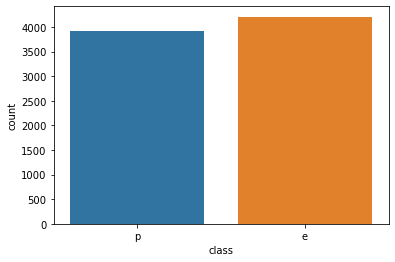

In [4]:
sns.countplot(x='class',data=df)

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
feat_uni = df.describe().transpose().reset_index().sort_values('unique')

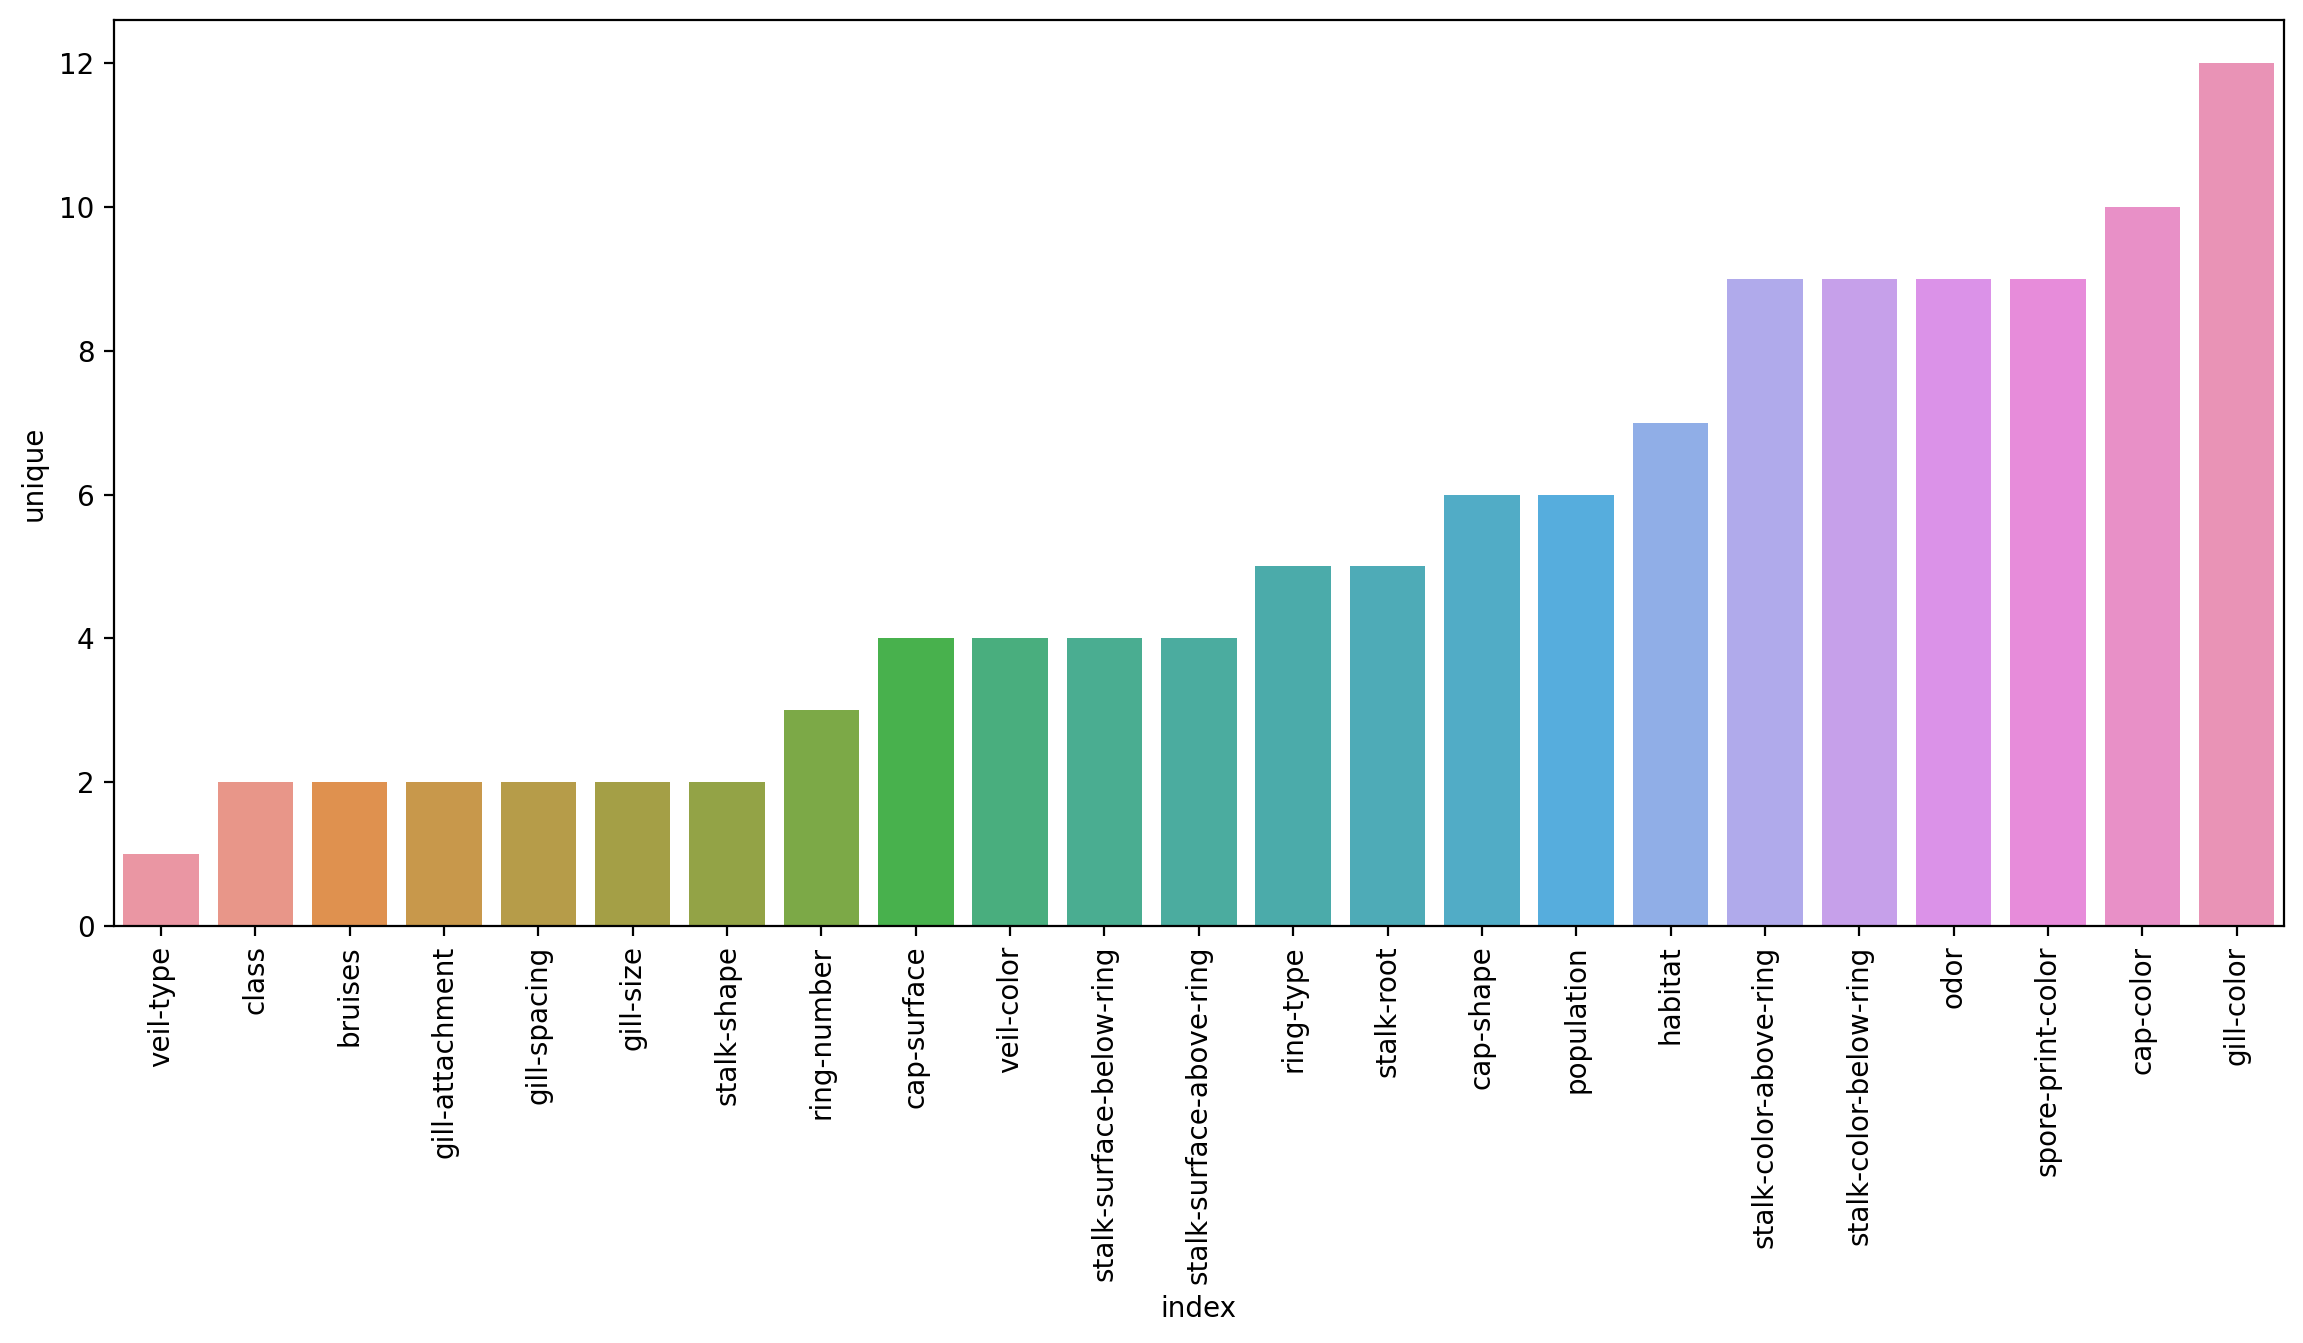

In [7]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=feat_uni,x='index',y='unique')
plt.xticks(rotation=90);

In [8]:
X = df.drop('class',axis=1)

In [9]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
X = pd.get_dummies(X,drop_first=True)

In [11]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [12]:
y = df['class']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [15]:
from sklearn.ensemble import AdaBoostClassifier

In [16]:
help(AdaBoostClassifier)

Help on class AdaBoostClassifier in module sklearn.ensemble._weight_boosting:

class AdaBoostClassifier(sklearn.base.ClassifierMixin, BaseWeightBoosting)
 |  AdaBoostClassifier(base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
 |  
 |  An AdaBoost classifier.
 |  
 |  An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
 |  classifier on the original dataset and then fits additional copies of the
 |  classifier on the same dataset but where the weights of incorrectly
 |  classified instances are adjusted such that subsequent classifiers focus
 |  more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost-SAMME [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  .. versionadded:: 0.14
 |  
 |  Parameters
 |  ----------
 |  base_estimator : object, default=None
 |      The base estimator from which the boosted ensemble is built.
 |      Support for sample weighting is requi

In [17]:
model = AdaBoostClassifier(n_estimators=1)

In [18]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [19]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [20]:
predictions = model.predict(X_test)

In [21]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [23]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
model.feature_importances_.argmax()

22

In [25]:
X.columns[22]

'odor_n'

This tells us that if AdaBoost had to choose just ONE stump that splits on a SINGLE feature TYPE (in this case odour = none), it concluded that no odour was the best way to determine if a mushroom was poisonous or edible.

<AxesSubplot:xlabel='odor', ylabel='count'>

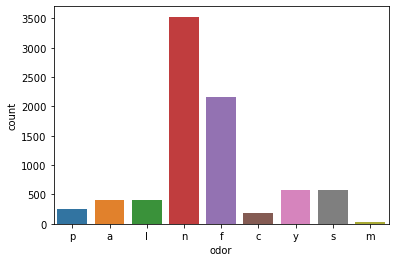

In [26]:
sns.countplot(data=df,x='odor')

<AxesSubplot:xlabel='odor', ylabel='count'>

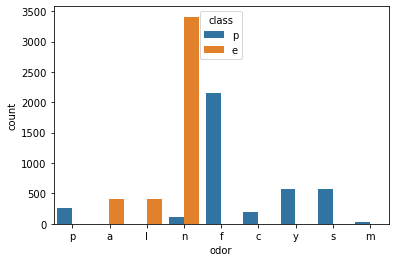

In [27]:
sns.countplot(data=df,x='odor',hue='class')

In [28]:
len(X.columns)

95

In [29]:
error_rates = []

for n in range(1,96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

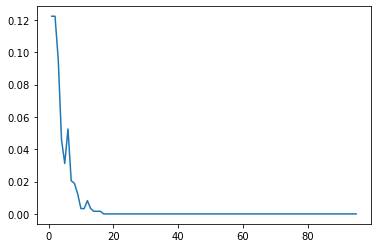

In [30]:
plt.plot(range(1,96),error_rates)

In [31]:
feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [32]:
imp_feats = feats[feats['Importance']>0]

In [33]:
imp_feats

,Importance
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


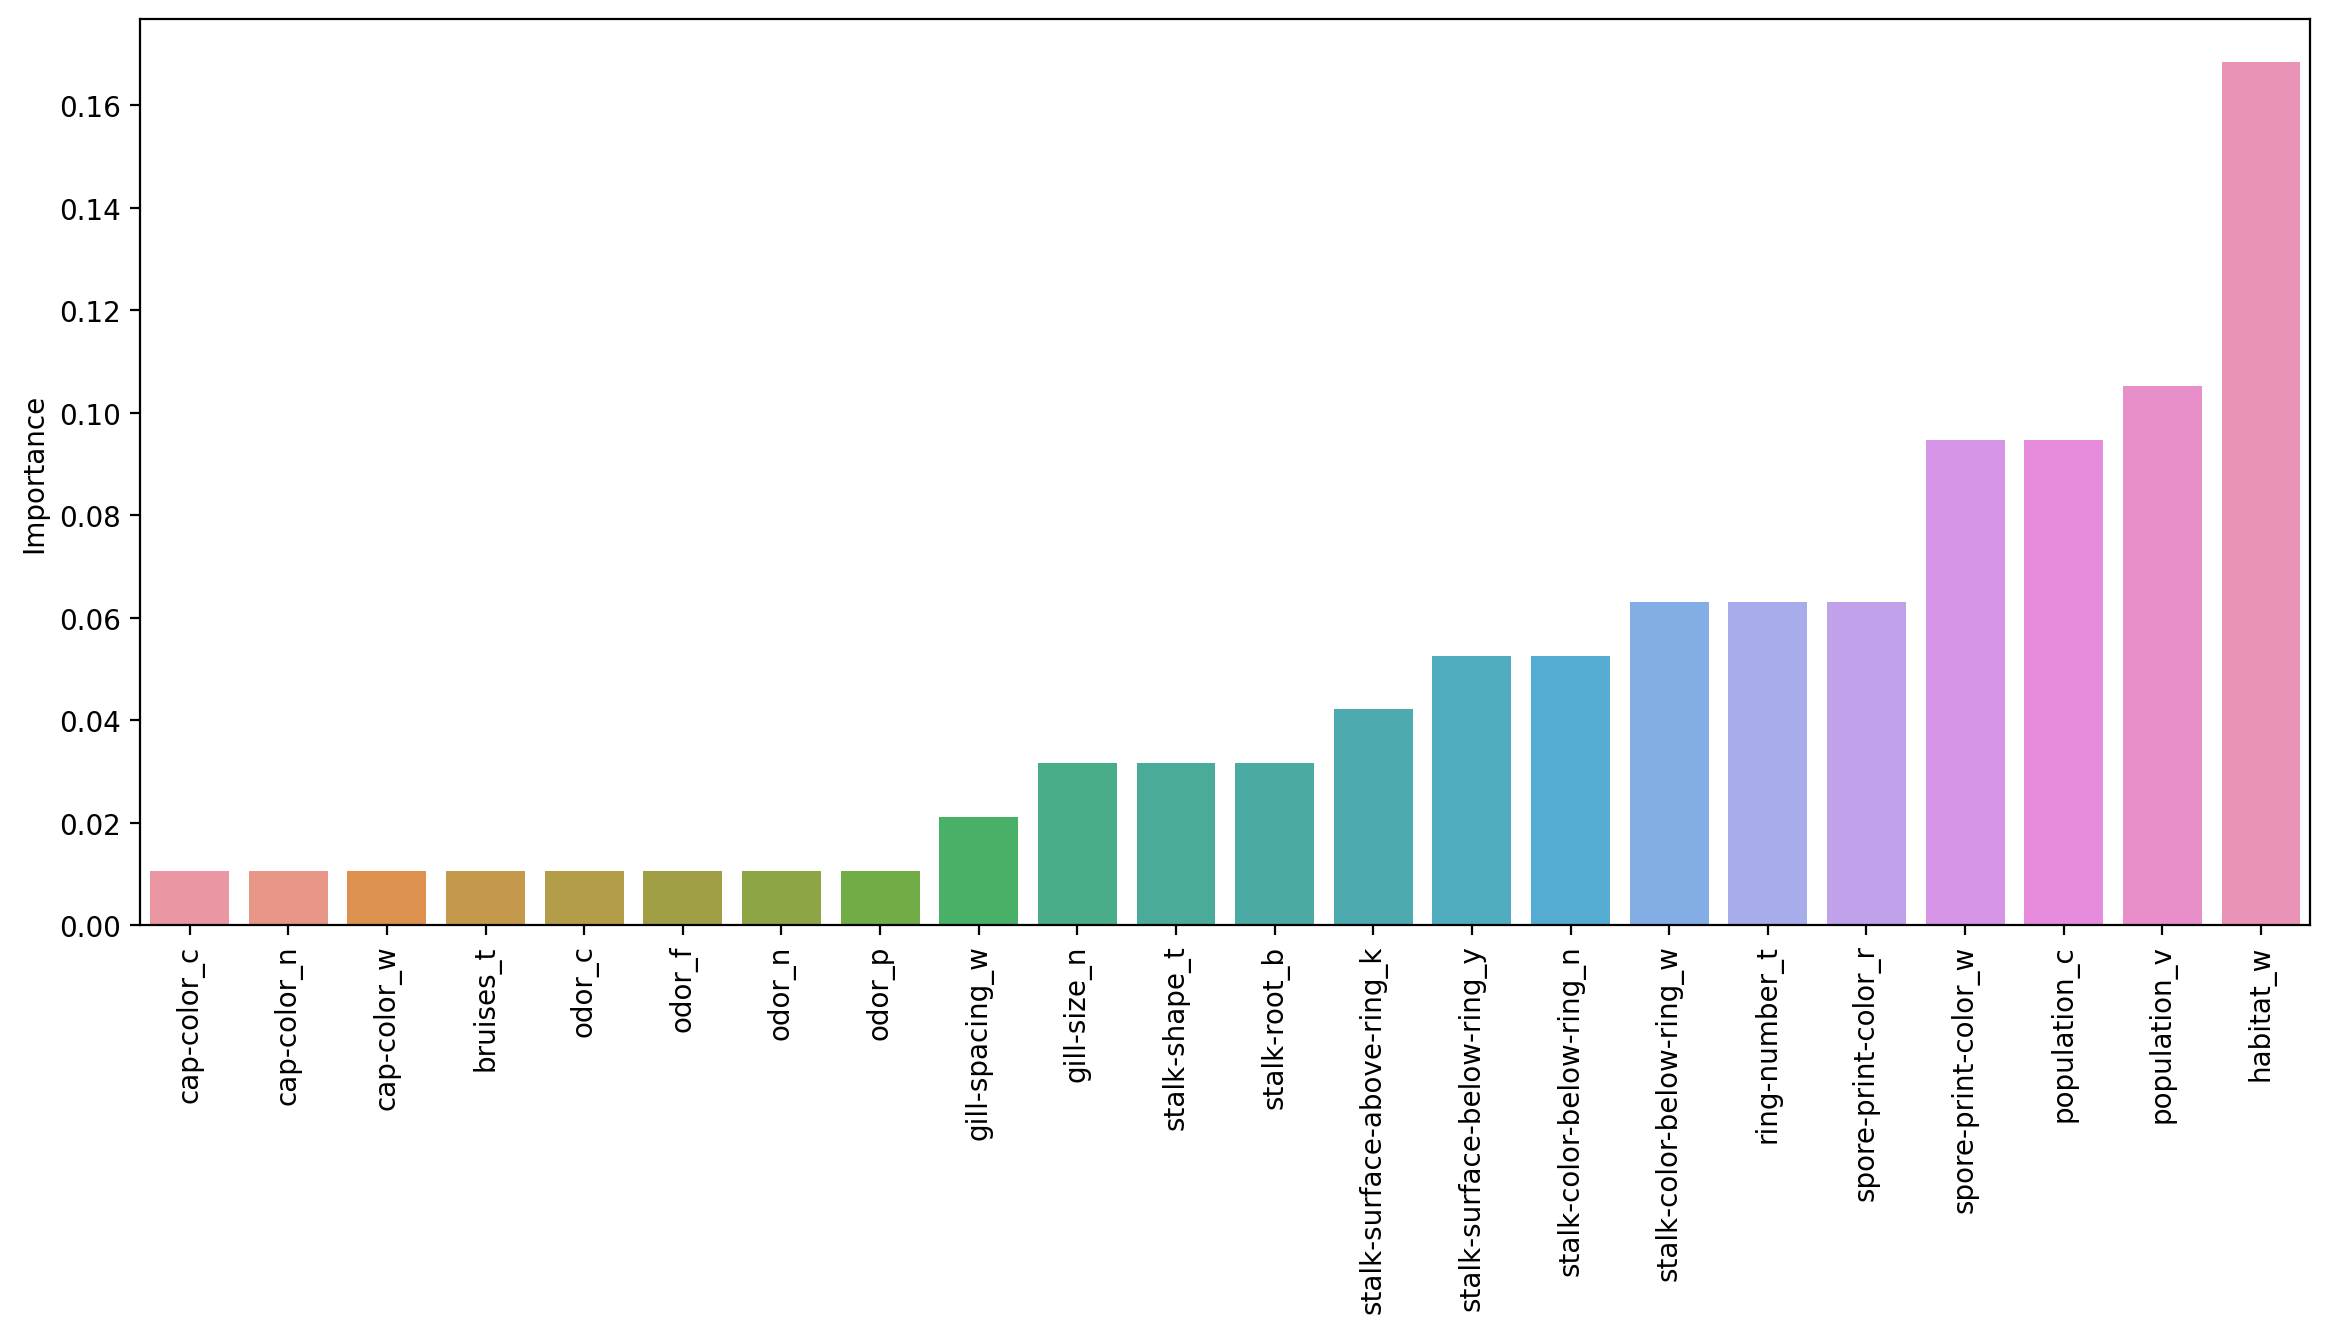

In [34]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.index,y='Importance')
plt.xticks(rotation=90);

# Gradient Boosting

Similar idea to AdaBoost in that weak learners are created in series in order to produce a strong ensemble model.

Gradient boosting makes use of the residual error for learning.

**Gradient boosting vs AdaBoost:**

- Larger trees allowed in gradient boosting.
- Learning rate coefficient same for all weak learners in gradient boosting.
- Gradual series learning is based on training on the residuals of the previous model.

**Gradient Boosting Process:**

$$ F_{m} = F_{m-1} + f_{m} $$

We can adjust learning rate to adjust the gradient boosting process by multiplying the residual prediction by a learning rate, that is the same across all weak learners.

**Overall process:**

- Create intial model: $f_{0}$
- Train another model on error: $e = y - f_{0}$
- Create new prediction: $F_{1} = f_{0} + ηf_{1}$
- Repeat as needed: $F_{m} = f_{m-1} + ηf_{m}$

Fairly robust to overfitting.

Learning rate is between 0-1.

A lower learning rate means that more estimators (decision trees) will be needed to have an effect. This is because a low LR would mean each subsequent tree has little 'say', meaning more trees needed to be created, causing longer computational training time. There is a tradeoff.

If learning rate is too large, you're not taking the time to learn off the residuals, therefore not peak performance. Grid search for LR typically.

**Intuition:**

We optimise the series of trees by learning on the residuals, forcing subsequent trees to attempt to correct for the error in the previous trees.

In [35]:
df = pd.read_csv('mushrooms.csv')

In [36]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [37]:
X = df.drop('class',axis=1)

In [38]:
X = pd.get_dummies(X,drop_first=True)

In [39]:
y = df['class']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {'n_estimators':[50,100],
             'learning_rate':[0.1,0.05,0.2],
             'max_depth':[3,4,5]}

In [44]:
gb_model = GradientBoostingClassifier()

In [45]:
grid = GridSearchCV(gb_model,param_grid)

In [46]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [47]:
predictions = grid.predict(X_test)

In [48]:
grid.best_estimator_

GradientBoostingClassifier()

In [51]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [52]:
# Notice that the best params are the default values, hence the best estimator 
# returns an empty ().

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [53]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 3.69189239e-17, 0.00000000e+00, 0.00000000e+00,
       9.43762267e-17, 1.04652037e-03, 0.00000000e+00, 3.78276239e-06,
       2.40725086e-18, 0.00000000e+00, 8.39866495e-18, 2.49345344e-20,
       9.01046967e-17, 1.35003364e-21, 0.00000000e+00, 2.22085609e-08,
       2.31055039e-03, 5.17204085e-02, 6.24175887e-04, 1.00159066e-02,
       1.82499853e-02, 3.51866861e-04, 6.14744334e-01, 9.20844491e-04,
       0.00000000e+00, 0.00000000e+00, 4.38163397e-18, 1.25092906e-02,
       1.09310232e-02, 0.00000000e+00, 1.16686460e-16, 3.53427068e-18,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.34343374e-17,
       2.03624987e-17, 0.00000000e+00, 2.43264323e-18, 4.90181955e-18,
       1.39540534e-17, 1.02296921e-03, 1.35970285e-01, 7.71855052e-03,
       5.17747365e-02, 3.60010033e-03, 2.59824622e-04, 6.65702318e-06,
       0.00000000e+00, 5.62862863e-04, 1.43654965e-02, 9.83043394e-06,
       0.00000000e+00, 0.00000000e+00, 1.17280174e-04, 0.00000000e+00,
      

In [55]:
feat_import = grid.best_estimator_.feature_importances_

In [56]:
imp_feat = pd.DataFrame(index=X.columns,
                       data=feat_import,
                       columns=['Importance'])

In [57]:
imp_feat

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,3.691892e-17
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,9.437623e-17
...,...
habitat_l,0.000000e+00
habitat_m,2.476911e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [58]:
imp_feat = imp_feat[imp_feat['Importance']>0.0005]

In [61]:
imp_feat

,Importance
cap-surface_g,0.001047
cap-color_y,0.002311
bruises_t,0.051720
odor_c,0.000624
odor_f,0.010016
odor_l,0.018250
odor_n,0.614744
odor_p,0.000921
gill-spacing_w,0.012509
gill-size_n,0.010931


In [63]:
imp_feat = imp_feat.sort_values('Importance')

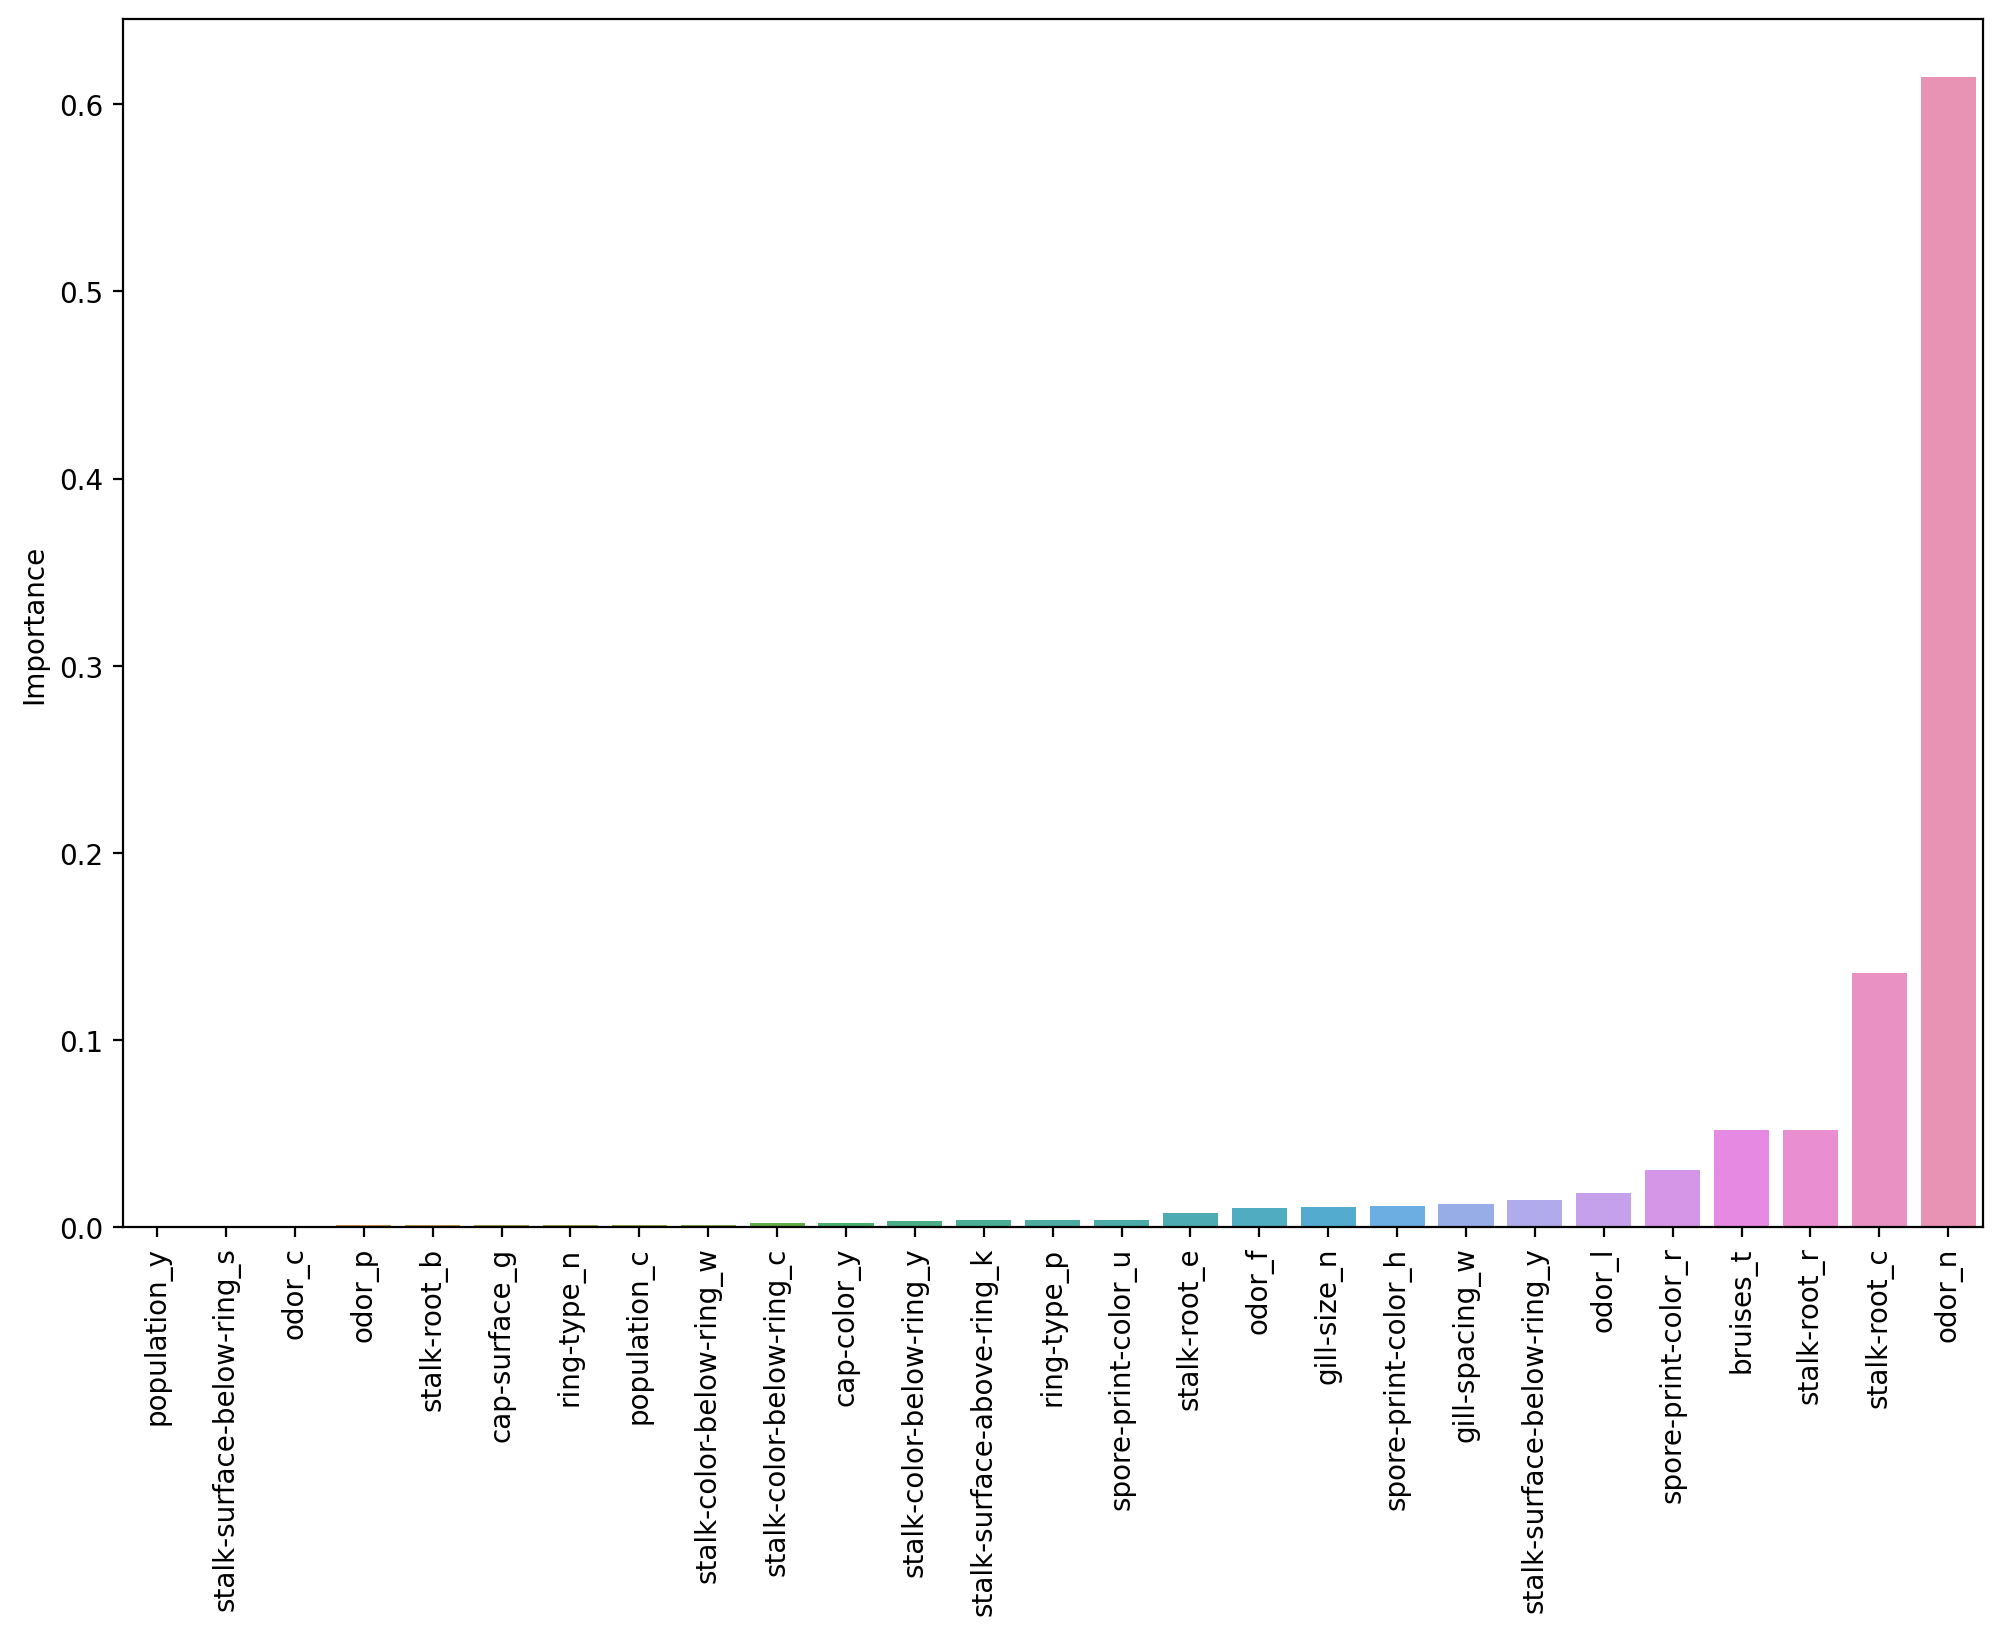

In [67]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(data=imp_feat,
           x=imp_feat.index,
           y='Importance')

plt.xticks(rotation=90);